In [1]:
import spacepy.pycdf as pycdf
import sys
sys.path.append('c:/users/cschiff/Documents/GitHub/PAD/')

In [2]:
import PAD
import Grapher

In [24]:
debug_filename   = 'C:\Yuggoth\BBF\mms1_fpi_brst_l2_des-debug_20160809092044_v3.1.1.cdf'.replace('\\','/')
debug_i_filename = 'C:\Yuggoth\BBF\mms1_fpi_brst_l2_dis-debug_20160809092044_v3.1.1.cdf'.replace('\\','/')
dist_filename    = 'C:\Yuggoth\BBF\mms1_fpi_brst_l2_des-dist_20160809092044_v3.1.1.cdf'.replace('\\','/')
dist_i_filename  = 'C:\Yuggoth\BBF\mms1_fpi_brst_l2_dis-dist_20160809092044_v3.1.1.cdf'.replace('\\','/')
photo_filename   = 'C:\Yuggoth\Photoelectron Model\mms_fpi_brst_l2_des-bgdist_v1.1.0_p0-2.cdf'.replace('\\','/')

In [25]:
cdf_dict       = {'debug'   : pycdf.CDF(debug_filename),
                  'dist'    : pycdf.CDF(dist_filename),
                  'photo'   : pycdf.CDF(photo_filename),
                  'debug_i' : pycdf.CDF(debug_i_filename),
                  'dist_i'  : pycdf.CDF(dist_i_filename)}
obs            = 'mms1'
mode           = 'brst'
species        = 'des'
ver            = 'ver3'
corrections_on = 0

In [5]:
core_data      = PAD.load_particle_data(cdf_dict,obs,mode,species,ver,corrections_on)

PAD.py:306: RuntimeWarning: invalid value encountered in divide
  counts                   = (dist['Dist']/dist['Err'])**2


In [6]:
core_data.keys()

['bfield', 'jN_err', 'jN', 'v_dirs', 'dist_data', 'counts', 'parms']

A quick check on the pitch angles computed in PAD

In [7]:
my_phi  = core_data['parms']['Phi'][7,5]*np.pi/180.0

In [8]:
my_theta = core_data['parms']['Theta'][6]*np.pi/180.0

In [9]:
my_look = [sp.cos(my_phi)*sp.sin(my_theta),sp.sin(my_phi)*sp.sin(my_theta),sp.cos(my_theta)]

In [10]:
my_look

[0.38349272289401076, 0.87673721127747861, 0.29028467725446233]

In [11]:
print core_data['v_dirs'][7,5,6]
print core_data['v_dirs'][7,5,6] + my_look

[-0.38349272 -0.87673721 -0.29028468]
[  1.11022302e-16  -1.11022302e-16   0.00000000e+00]


In [12]:
num_time_steps = len(core_data['dist_data']['Epoch'])

In [13]:
time_interval_str = 'Burst Interval 08_09_2017 09_20_44'
file_path         = 'c:/Users/cschiff/Documents/GitHub/PAD/'
Elow              = 0
Ehigh             = 31
#for time_label 
time_label        = 0
Grapher.create_raw_survey_PAD_plot(mode,time_label,Elow,Ehigh,time_interval_str,file_path,core_data)

In [14]:
core_data['dist_data']['Epoch']

array([datetime.datetime(2016, 8, 9, 9, 20, 44, 11994),
       datetime.datetime(2016, 8, 9, 9, 20, 44, 41994),
       datetime.datetime(2016, 8, 9, 9, 20, 44, 71994), ...,
       datetime.datetime(2016, 8, 9, 9, 21, 39, 932274),
       datetime.datetime(2016, 8, 9, 9, 21, 39, 962274),
       datetime.datetime(2016, 8, 9, 9, 21, 39, 992274)], dtype=object)

In [15]:
cdf_dict['debug']['Epoch'][-1]

datetime.datetime(2016, 8, 9, 9, 21, 39, 992274)

In [16]:
print len(cdf_dict['debug']['Epoch']), len(core_data['dist_data']['Epoch'])

1867 1867


In [17]:
moments_data = PAD.load_moments_data(obs,cdf_dict['debug'])

PAD.py:469: RuntimeWarning: divide by zero encountered in log10
  omni            = np.ma.masked_invalid(np.log10(temp).T)
PAD.py:471: RuntimeWarning: divide by zero encountered in log10
  low             = np.ma.masked_invalid(np.log10(temp).T)
PAD.py:473: RuntimeWarning: divide by zero encountered in log10
  mid             = np.ma.masked_invalid(np.log10(temp).T)
PAD.py:475: RuntimeWarning: divide by zero encountered in log10
  high            = np.ma.masked_invalid(np.log10(temp).T)
PAD.py:477: RuntimeWarning: divide by zero encountered in divide
  ratio           = np.ma.masked_invalid(np.divide(par,anti))
PAD.py:477: RuntimeWarning: invalid value encountered in divide
  ratio           = np.ma.masked_invalid(np.divide(par,anti))
PAD.py:478: RuntimeWarning: divide by zero encountered in log10
  anti            = np.ma.masked_invalid(np.log10(anti))
PAD.py:479: RuntimeWarning: divide by zero encountered in log10
  par             = np.ma.masked_invalid(np.log10(par))
PAD.py:480: Ru

In [18]:
Grapher.make_brst_summary_plot(obs,moments_data,0)

In [19]:
def make_brst_summary_plot(obs,moments_data,time_label):
    
    times    = moments_data['times']   
    energies = moments_data['energies']
    sc_pot   = moments_data['sc_pot']  
    bx       = moments_data['bx']      
    by       = moments_data['by']      
    bz       = moments_data['bz']      
    bnorm    = moments_data['bnorm']   
    par      = moments_data['par']     
    anti     = moments_data['anti']    
    perp     = moments_data['perp']    
    omni     = moments_data['omni']    
    low      = moments_data['low']     
    mid      = moments_data['mid']     
    high     = moments_data['high']    
    angles   = moments_data['angles']  
    ratio    = moments_data['ratio']   
    
    BRST_time = dt.datetime.strftime(times[time_label],'%Y-%m-%d %H%M%S.%f')
    
    ###########################################################################
    #create the figure and axes
    fig = plt.figure(figsize=(32,20))
    #fig.autofmt_xdate()
    
    cbar_off = 0.01
    cbar_wth = 0.01
    cmap.jet.set_bad('k',alpha=1.0)    
    cmap.bwr.set_bad('k',alpha=1.0)    
    
    ###########################################################################
    #0th pane - spectrogram
    min_exp = 4
    max_exp = 8
    ax0     = fig.add_subplot(6,2,1)
    
    #plot the data
    spec_data = ax0.pcolormesh(times,energies,omni,cmap=cmap.jet,vmin=max_exp,vmax=min_exp)
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax0.xaxis.set_major_locator(seconds)
    ax0.xaxis.set_major_formatter(time_format)
    ax0.set_xlabel('Time')
    
    #deal with the y-axis
    ax0.set_yscale('log')
    ax0.set_ylim([energies[0],energies[31]])
    ax0.set_ylabel('Energy (eV)')
    
    #create the colorbar
    log_cbar_span = np.array(range(min_exp,max_exp+1))
    cb_ax0        = fig.add_axes(cbar_position(ax0,cbar_off,cbar_wth))
    spec_cbar     = fig.colorbar(spec_data,cax=cb_ax0,ticks=log_cbar_span,format=ticker.FormatStrFormatter('$10^{%d}$'))
    #cbar_span     = ['%1.0e' % val for val in 10.0**log_cbar_span]
    #cb_ax0.set_yticklabels(cbar_span)
    
    #put on a title
    ax0.set_title('%s on %s' % (obs.upper(),BRST_time))
    
    ax0.plot(times,sc_pot,'k-')
    ax0.axvline(times[time_label],color = 'k')
    
    ###########################################################################
    #1st pane - low energy PAD
    min_exp = int(np.floor(np.min(low)))
    max_exp = int(np.ceil(np.max(low)))
    ax1 = fig.add_subplot(6,2,3)
    
    #plot the data
    PAD_low_dat = ax1.pcolormesh(times,angles,low,cmap=cmap.bwr,vmin=min_exp,vmax=max_exp)
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax1.xaxis.set_major_locator(seconds)
    ax1.xaxis.set_major_formatter(time_format)
    ax1.set_xlabel('Time')
    
    #deal with the y-axis
    ax1.set_yscale('linear')
    ax1.set_ylim([0,180])
    ax1.set_ylabel('Low Pitch Ang (deg)')
    
    #create the colorbar
    log_cbar_span = np.array(range(min_exp,max_exp+1))
    cb_ax1        = fig.add_axes(cbar_position(ax1,cbar_off,cbar_wth))
    PAD_low_cbar  = fig.colorbar(PAD_low_dat,cax=cb_ax1,ticks=log_cbar_span,format=ticker.FormatStrFormatter('$10^{%d}$'))
    ax1.axvline(times[time_label],color = 'k')

     
    ###########################################################################
    #2nd pane - mid energy PAD
    min_exp = int(np.floor(np.min(mid)))
    max_exp = int(np.ceil(np.max(mid))) 
    ax2 = fig.add_subplot(6,2,5)
    
    #plot the data
    PAD_mid_dat = ax2.pcolormesh(times,angles,mid,cmap=cmap.bwr)
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax2.xaxis.set_major_locator(seconds)
    ax2.xaxis.set_major_formatter(time_format)
    ax2.set_xlabel('Time')
    
    #deal with the y-axis
    ax2.set_yscale('linear')
    ax2.set_ylim([0,180])
    ax2.set_ylabel('Mid Pitch Ang (deg)')
    
    #create the colorbar
    log_cbar_span = np.array(range(min_exp,max_exp+1))
    cb_ax2        = fig.add_axes(cbar_position(ax2,cbar_off,cbar_wth))
    PAD_mid_cbar  = fig.colorbar(PAD_mid_dat,cax=cb_ax2,ticks=log_cbar_span,format=ticker.FormatStrFormatter('$10^{%d}$'))
    ax2.axvline(times[time_label],color = 'k')
    

    ###########################################################################
    #3rd pane - high energy PAD
    min_exp = int(np.floor(np.min(high)))
    max_exp = int(np.ceil(np.max(high))) 
    ax3 = fig.add_subplot(6,2,7)
    
    #plot the data
    PAD_high_dat = ax3.pcolormesh(times,angles,high,cmap=cmap.bwr)
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax3.xaxis.set_major_locator(seconds)
    ax3.xaxis.set_major_formatter(time_format)
    ax3.set_xlabel('Time')
    
    #deal with the y-axis
    ax3.set_yscale('linear')
    ax3.set_ylim([0,180])
    ax3.set_ylabel('Hi Pitch Ang (deg)')
    
    #create the colorbar
    log_cbar_span = np.array(range(min_exp,max_exp+1))
    cb_ax3        = fig.add_axes(cbar_position(ax3,cbar_off,cbar_wth))
    PAD_high_cbar = fig.colorbar(PAD_high_dat,cax=cb_ax3,ticks=log_cbar_span,format=ticker.FormatStrFormatter('$10^{%d}$'))
    ax3.axvline(times[time_label],color = 'k')

    ###########################################################################
    #4th pane - ratio of PADs
    ax4 = fig.add_subplot(6,2,9)
    
    #plot the data
    asym_data = ax4.pcolormesh(times,energies,ratio,cmap=cmap.bwr,vmin=0.6,vmax=1.4)
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax4.xaxis.set_major_locator(seconds)
    ax4.xaxis.set_major_formatter(time_format)
    ax4.set_xlabel('Time')
   
    #deal with the y-axis
    ax4.set_yscale('log')
    ax4.set_ylim([energies[0],energies[31]])
    ax4.set_ylabel('Energy (eV)')
    
    #create the colorbar
    cb_ax4          = fig.add_axes(cbar_position(ax4,cbar_off,cbar_wth))
    asym_cbar       = fig.colorbar(asym_data,cax=cb_ax4)
    ax4.axvline(times[time_label],color = 'k')    

    ###########################################################################
    #5th pane - mag field
    ax5 = fig.add_subplot(6,2,11)
    
    #plot the data
    ax5.plot(times,bx*bnorm,label='Bx')
    ax5.plot(times,by*bnorm,label='By')
    ax5.plot(times,bz*bnorm,label='Bz')
    ax5.set_xlim([times[0],times[-1]])
    
    #deal with epochs on the x-axis
    time_format = mdates.DateFormatter('%H:%M:%S')
    seconds     = mdates.SecondLocator(range(0,59),interval = 5,tz=None)
    ax5.xaxis.set_major_locator(seconds)
    ax5.xaxis.set_major_formatter(time_format)
    ax5.set_xlabel('Time')
    
    #deal with the y-axis
    ax5.set_yscale('linear')
    ax5.set_ylabel('Magnetic Field (nT)')
    ax5.axvline(times[time_label],color = 'k')
    
    ax5.legend(bbox_to_anchor=[1.12,1.0])

    ###########################################################################
    #6th pane - energy spectra
    ax6     = fig.add_subplot(6,2,2)
    Q_par   = 10**(par[:,time_label])
    Q_perp  = 10**(perp[:,time_label])
    Q_anti  = 10**(anti[:,time_label])
    
    #plot the data
    par_spec_data  = ax6.loglog(energies,Q_par,'ko-',label='Parallel')
    perp_spec_data = ax6.loglog(energies,Q_perp,'gs-',label='Perpendicular')
    anti_spec_data = ax6.loglog(energies,Q_anti,'r^-',label='Anti-Parallel')
    
    #x-axis
    ax6.set_xlabel('Energy (eV)')
    ax6.set_xlim([50.0,30.0e3])
    
    #deal with the y-axis
    ax6.set_ylabel('PSD (cm^-6 s^-3)')
    
    ax6.legend(bbox_to_anchor=[1.12,1.0])
       
    ###########################################################################
    #7th pane - perpendicular energy spectrum
    #ax7     = fig.add_subplot(6,2,4)
    
    
    ###########################################################################
    #8th pane - anti-parallel energy spectrum
    #ax8     = fig.add_subplot(6,2,6)
    
    
    ###########################################################################
    #9th pane - Differnential Counter-Streaming energy spectrum
    ax9     = fig.add_subplot(6,2,8)
    
    #plot the data
    ax9.semilogx(energies,Q_par - Q_anti,'b.-')
    
    #x-axis
    ax9.set_xlabel('Energy (eV)')
    ax9.set_xlim([50.0,30.0e3])    
    
    #deal with the y-axis
    ax9.set_ylabel('Differential Counter-Streaming \n PSD (cm^-6 s^-3)')
    ax9.axhline(0,color='k')
    ax9.grid('on')
    
    ###########################################################################
    #10th pane - Relative Counter-Streaming energy spectrum
    ax10     = fig.add_subplot(6,2,10)
    
    #plot the data
    ax10.semilogx(energies,np.divide(Q_par,Q_anti),'b.-')
    
    #x-axis
    ax10.set_xlabel('Energy (eV)')
    ax10.set_xlim([50.0,30.0e3])
    
    #deal with the y-axis
    ax10.set_ylabel('Relative Counter-Streaming\n PSD (Par/Anti)')
    ax10.set_ylim([0.2,1.8])
    ax10.axhline(1,color='k')
    ax10.grid('on')    
    
    
    ###########################################################################
    #save the file
    
    #fig.tight_layout()
    filename = 'x:/fpishare/Conrad/PAD_plots/BRST_summary_%s_%s.png' % (obs,BRST_time)
    fig.savefig(filename)
    fig.clf()

In [25]:
print cdf_dict['debug']['mms1_des_temppara_brst'][0]
print cdf_dict['debug']['mms1_des_tempperp_brst'][0]


1983.49365234
1716.23632812


In [28]:
print cdf_dict['debug']['mms1_des_temptensor_dbcs_brst'][0,:,:]

[[ 1949.08837891   -30.04393959   -62.63698959]
 [  -30.04393959  1716.03234863   119.22199249]
 [  -62.63698959   119.22199249  1750.84558105]]


In [49]:
A = cdf_dict['debug']['mms1_des_temptensor_dbcs_brst'][0,:,:]

In [50]:
b = np.array([moments_data['bx'][0],moments_data['by'][0],moments_data['bz'][0]])

In [41]:
print b

[-0.92333835  0.19969317  0.32993561]


In [42]:
A.dot(b)

array([-1826.33374023,   409.75622559,   659.30926514], dtype=float32)

In [20]:
moments_data.keys()

['sc_pot',
 'par',
 'ratio',
 'omni',
 'energies',
 'mid',
 'bnorm',
 'times',
 'high',
 'perp',
 'anti',
 'low',
 'angles',
 'bx',
 'by',
 'bz']

In [22]:
cdf_dict['debug']

<CDF:
Epoch: CDF_TIME_TT2000 [1867]
Epoch_minus_var: CDF_REAL4 [] NRV
Epoch_plus_var: CDF_REAL4 [] NRV
mms1_des_alpha_brst: CDF_REAL4 [30] NRV
mms1_des_alpha_delta_brst: CDF_REAL4 [30] NRV
mms1_des_b_dmpa_brst: CDF_REAL4 [1867, 4]
mms1_des_b_dmpa_srvy: CDF_REAL4 [1867, 4]
mms1_des_b_gse_brst: CDF_REAL4 [1867, 4]
mms1_des_b_gse_srvy: CDF_REAL4 [1867, 4]
mms1_des_bentPipeB_Norm: CDF_REAL8 [1867]
mms1_des_bentPipeB_X_DSC: CDF_REAL4 [1867]
mms1_des_bentPipeB_Y_DSC: CDF_REAL4 [1867]
mms1_des_bentPipeB_Z_DSC: CDF_REAL4 [1867]
mms1_des_bulkv_dbcs_brst: CDF_REAL4 [1867, 3]
mms1_des_bulkv_dbcs_label_brst: CDF_CHAR*7 [3] NRV
mms1_des_bulkv_err_brst: CDF_REAL4 [1867, 3]
mms1_des_bulkv_err_label_brst: CDF_CHAR*6 [3] NRV
mms1_des_bulkv_gse_brst: CDF_REAL4 [1867, 3]
mms1_des_bulkv_gse_label_brst: CDF_CHAR*6 [3] NRV
mms1_des_bulkx_int: CDF_REAL4 [1867, 32]
mms1_des_bulky_int: CDF_REAL4 [1867, 32]
mms1_des_bulkz_int: CDF_REAL4 [1867, 32]
mms1_des_cartrep_brst: CDF_CHAR*1 [3] NRV
mms1_des_compressionlo

In [51]:
A

[[ 1949.08837891   -30.04393959   -62.63698959]
 [  -30.04393959  1716.03234863   119.22199249]
 [  -62.63698959   119.22199249  1750.84558105]]


In [52]:
A.trace()

5415.9663

In [53]:
A[0,0]+A[1,1]+A[2,2]

5415.9663

In [65]:
Id = np.identity(3)

In [55]:
b.T

1985.6792

In [58]:
p = np.array([[-1],[0],[1]])
q = np.array([1,2,3])

In [59]:
print p

[[-1]
 [ 0]
 [ 1]]


In [60]:
print p.T

[[-1  0  1]]


In [62]:
np.outer(p,p)

array([[ 1,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

In [81]:
r1 = np.matmul(p.T,p)

In [64]:
np.matmul(p,p.T)

array([[ 1,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

In [76]:
proj = Id - np.outer(B,B)

In [77]:
A_perp = np.matmul(proj,A)

In [78]:
np.linalg.eig(A_perp)

(array([ -6.89272626e-05,   1.82081566e+03,   1.61202690e+03]),
 array([[-0.9252873 ,  0.37822612,  0.07408408],
        [ 0.19166452,  0.63332631, -0.74771101],
        [ 0.32727378,  0.67516131,  0.65987863]]))

In [80]:
np.matmul(proj,B)

array([  3.66207287e-08,  -4.55080862e-10,  -2.65940070e-09])

In [74]:
B = b/np.linalg.norm(b)

In [75]:
B

array([-0.92274404,  0.19956464,  0.32972324], dtype=float32)

In [82]:
type(r1)

numpy.ndarray

In [83]:
r1.shape

(1L, 1L)

In [75]:
N = 120+2
print N, N/5
print cdf_dict['debug_i']['Epoch'][N/5]
print cdf_dict['debug']['Epoch'][N]

122 24
2016-08-09 09:20:47.672009
2016-08-09 09:20:47.672009


In [71]:
v_e = cdf_dict['debug']['mms1_des_bulkv_dbcs_brst'][N]
v_i = cdf_dict['debug_i']['mms1_dis_bulkv_dbcs_brst'][N/5]
print v_e
print v_i

[ 1026.99951172   217.38397217   432.2489624 ]
[ 95.2798996    8.75296307 -44.4859314 ]


In [72]:
n_e = cdf_dict['debug']['mms1_des_numberdensity_brst'][N]
n_i = cdf_dict['debug_i']['mms1_dis_numberdensity_brst'][N/5]
print n_e
print n_i

0.106582894921
0.282146900892


In [76]:
j = n_i*v_i - n_i*v_e
print j

[-262.88180542  -58.86459351 -134.50927734]


In [82]:
v_es = np.asarray(cdf_dict['debug']['mms1_des_bulkv_dbcs_brst'][:,0])
v_is = np.asarray(cdf_dict['debug_i']['mms1_dis_bulkv_dbcs_brst'][:,0])

In [80]:
t_e = np.asarray(cdf_dict['debug']['Epoch'])
t_i = np.asarray(cdf_dict['debug_i']['Epoch'])

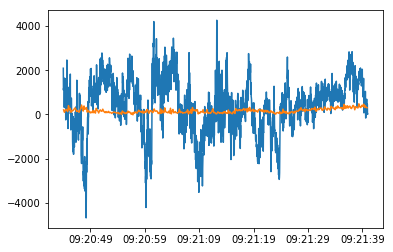

In [83]:
plt.plot(t_e,v_es)
plt.plot(t_i,v_is)

In [89]:
def SR_gamma(v):
    c = 3.0e8
    return np.sqrt(1.0 - v.dot(v)/c**2)

In [90]:
q = np.array([])
for vx in np.logspace(1,2.9e8);
    v = np.array([vx,0,0])

In [91]:
SR_gamma(v)

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


nan

In [93]:
np.sqrt(v_e.dot(v_e))

1135.2633

In [94]:
np.sqrt(v_i.dot(v_i))

105.51716